<a href="https://colab.research.google.com/github/dhanush852/intro_to-ml/blob/main/Homework_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch

1st Problem

In [77]:
t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)

1a Problem

In [78]:
def model(t_u, w1, w2, b):
    return w2*t_u**2 + w1*t_u + b #w2 * t_u ** 2 + w1 * t_u + b.

In [79]:
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

In [80]:
def training_loop(n_epochs, optimizer, params, t_u, t_c):
    for epoch in range(1, n_epochs + 1):
        t_p = model(t_u, *params)
        loss = loss_fn(t_p, t_c)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if epoch <= 1 or epoch % 500 ==0:
            print(f"Epoch {epoch}, loss {loss.item():.4f}")

    return params

In [81]:
import torch.optim as optim

dir(optim)

['ASGD',
 'Adadelta',
 'Adagrad',
 'Adam',
 'AdamW',
 'Adamax',
 'LBFGS',
 'NAdam',
 'Optimizer',
 'RAdam',
 'RMSprop',
 'Rprop',
 'SGD',
 'SparseAdam',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_functional',
 '_multi_tensor',
 'lr_scheduler',
 'swa_utils']

1b problem


In [82]:
t_un = 0.1 * t_u
params = torch.tensor([1.0,1.0,0.0], requires_grad=True)
learning_rate = 0.1
optimizer = optim.Adam([params], lr = learning_rate)

training_loop(
    n_epochs=5000,
    optimizer = optimizer,
    params = params,
    t_u = t_un,
    t_c = t_c)

Epoch 1, loss 675.7944
Epoch 500, loss 2.7825
Epoch 1000, loss 2.4860
Epoch 1500, loss 2.2615
Epoch 2000, loss 2.1441
Epoch 2500, loss 2.1019
Epoch 3000, loss 2.0921
Epoch 3500, loss 2.0908
Epoch 4000, loss 2.0907
Epoch 4500, loss 2.0907
Epoch 5000, loss 2.0907


tensor([  2.4760,   0.2830, -10.6496], requires_grad=True)

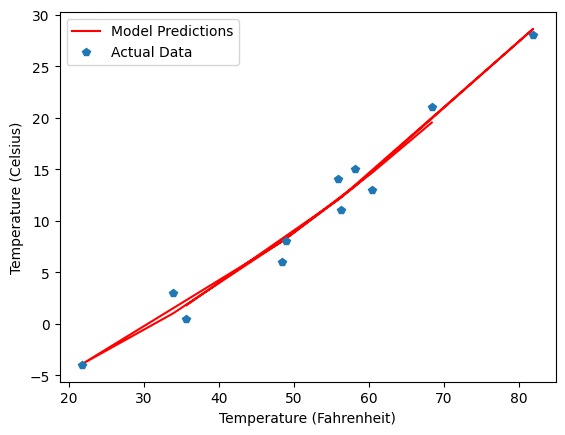

In [83]:
t_p = model(t_un, *params)

plt.figure()

# Set labels for the axes
plt.xlabel('Temperature (Fahrenheit)')
plt.ylabel('Temperature (Celsius)')

# Plot the model's predictions in peachpuff color
plt.plot(t_u.numpy(), t_p.detach().numpy(), color='red', label='Model Predictions')

# Plot the actual data as points
plt.plot(t_u.numpy(), t_c.numpy(), 'p', label='Actual Data')

# Add a legend to the plot
plt.legend()

# Show the plot
plt.show()


In [84]:
t_un = 0.01 * t_u
params = torch.tensor([1.0,1.0,0.0], requires_grad=True)
learning_rate = 0.01
optimizer = optim.Adam([params], lr = learning_rate)

training_loop(
    n_epochs=5000,
    optimizer = optimizer,
    params = params,
    t_u = t_un,
    t_c = t_c)

Epoch 1, loss 165.4495
Epoch 500, loss 57.9494
Epoch 1000, loss 40.5514
Epoch 1500, loss 33.9744
Epoch 2000, loss 27.2750
Epoch 2500, loss 20.7528
Epoch 3000, loss 14.9406
Epoch 3500, loss 10.1993
Epoch 4000, loss 6.6878
Epoch 4500, loss 4.3673
Epoch 5000, loss 3.0380


tensor([19.8351, 27.2414, -7.6692], requires_grad=True)

In [10]:
t_un.numpy()

array([3.5700002, 5.59     , 5.82     , 8.190001 , 5.63     , 4.8900003,
       3.39     , 2.18     , 4.84     , 6.0400004, 6.84     ],
      dtype=float32)

In [11]:
t_p.detach().numpy()

array([ 1.7972012, 12.035997 , 13.348276 , 28.614595 , 12.262068 ,
        8.226366 ,  0.9969187, -3.9067006,  7.964863 , 14.631525 ,
       19.528837 ], dtype=float32)

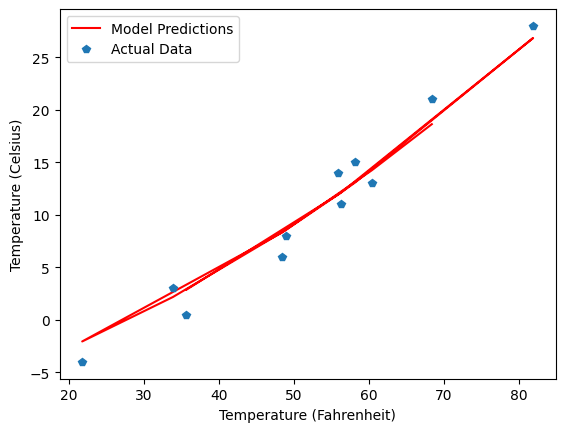

In [85]:
t_p = model(t_un, *params)

plt.figure()

# Set labels for the axes
plt.xlabel('Temperature (Fahrenheit)')
plt.ylabel('Temperature (Celsius)')

# Plot the nodel's predictions in peachpuff color
plt.plot(t_u.numpy(), t_p.detach().numpy(), color='red', label='Model Predictions')

# Plot the actual data as points
plt.plot(t_u.numpy(), t_c.numpy(), 'p', label='Actual Data')

# Add a legend to the plot
plt.legend()

# Show the plot
plt.show()


In [86]:
t_un = 0.01 * t_u
params = torch.tensor([1.0,1.0,0.0], requires_grad=True)
learning_rate = 0.001
optimizer = optim.Adam([params], lr = learning_rate)

training_loop(
    n_epochs=5000,
    optimizer = optimizer,
    params = params,
    t_u = t_un,
    t_c = t_c)

Epoch 1, loss 165.4495
Epoch 500, loss 146.4046
Epoch 1000, loss 129.5789
Epoch 1500, loss 114.7723
Epoch 2000, loss 101.7867
Epoch 2500, loss 90.4592
Epoch 3000, loss 80.6544
Epoch 3500, loss 72.2552
Epoch 4000, loss 65.1566
Epoch 4500, loss 59.2574
Epoch 5000, loss 54.4534


tensor([5.2978, 5.4165, 4.0355], requires_grad=True)

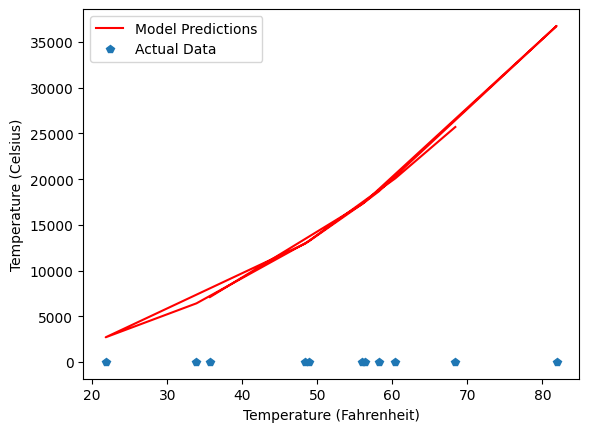

In [87]:
t_p = model(t_u, *params)

plt.figure()

# Set labels for the axes
plt.xlabel('Temperature (Fahrenheit)')
plt.ylabel('Temperature (Celsius)')

# Plot the model's predictions in peachpuff color
plt.plot(t_u.numpy(), t_p.detach().numpy(), color='red', label='Model Predictions')

# Plot the actual data as points
plt.plot(t_u.numpy(), t_c.numpy(), 'p', label='Actual Data')

# Add a legend to the plot
plt.legend()

# Show the plot
plt.show()

In [88]:
t_un = 0.01 * t_u
params = torch.tensor([1.0,1.0,0.0], requires_grad=True)
learning_rate = 0.0001
optimizer = optim.Adam([params], lr = learning_rate)

training_loop(
    n_epochs=5000,
    optimizer = optimizer,
    params = params,
    t_u = t_un,
    t_c = t_c)

Epoch 1, loss 165.4495
Epoch 500, loss 163.4383
Epoch 1000, loss 161.4469
Epoch 1500, loss 159.4780
Epoch 2000, loss 157.5304
Epoch 2500, loss 155.6028
Epoch 3000, loss 153.6945
Epoch 3500, loss 151.8047
Epoch 4000, loss 149.9329
Epoch 4500, loss 148.0788
Epoch 5000, loss 146.2419


tensor([1.4946, 1.4952, 0.4935], requires_grad=True)

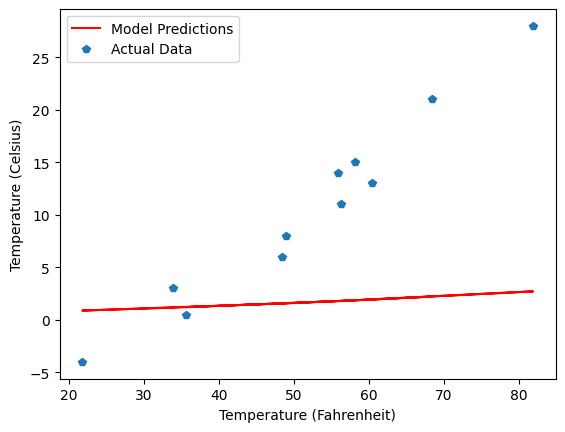

In [89]:
t_p = model(t_un, *params)

plt.figure()

# Set labels for the axes
plt.xlabel('Temperature (Fahrenheit)')
plt.ylabel('Temperature (Celsius)')

# Plot the model's predictions in peachpuff color
plt.plot(t_u.numpy(), t_p.detach().numpy(), color='red', label='Model Predictions')

# Plot the actual data as points
plt.plot(t_u.numpy(), t_c.numpy(), 'p', label='Actual Data')

# Add a legend to the plot
plt.legend()

# Show the plot
plt.show()

In [90]:
t_un = 0.01 * t_u
params = torch.tensor([1.0,1.0,0.0], requires_grad=True)
learning_rate = 0.1
optimizer = optim.SGD([params], lr = learning_rate)

training_loop(
    n_epochs=5000,
    optimizer = optimizer,
    params = params,
    t_u = t_un,
    t_c = t_c)

Epoch 1, loss 165.4495
Epoch 500, loss 2.1085
Epoch 1000, loss 2.0907
Epoch 1500, loss 2.0907
Epoch 2000, loss 2.0907
Epoch 2500, loss 2.0907
Epoch 3000, loss 2.0907
Epoch 3500, loss 2.0907
Epoch 4000, loss 2.0907
Epoch 4500, loss 2.0907
Epoch 5000, loss 2.0907


tensor([ 24.7210,  28.3420, -10.6403], requires_grad=True)

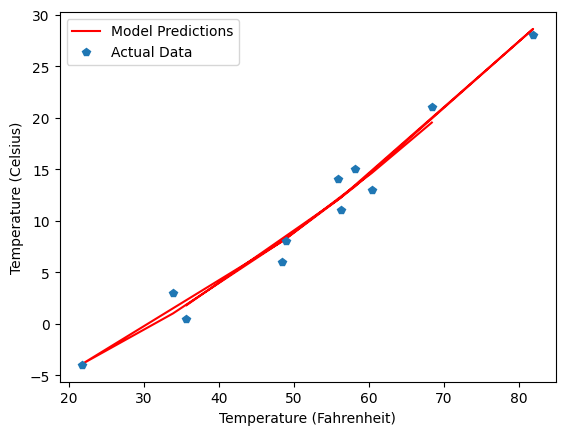

In [91]:
t_p = model(t_un, *params)

plt.figure()

# Set labels for the axes
plt.xlabel('Temperature (Fahrenheit)')
plt.ylabel('Temperature (Celsius)')

# Plot the model's predictions in peachpuff color
plt.plot(t_u.numpy(), t_p.detach().numpy(), color='red', label='Model Predictions')

# Plot the actual data as points
plt.plot(t_u.numpy(), t_c.numpy(), 'p', label='Actual Data')

# Add a legend to the plot
plt.legend()

# Show the plot
plt.show()

In [92]:
t_un = 0.1* t_u
params = torch.tensor([1.0,1.0,0.0], requires_grad=True)
learning_rate = 0.00000001
optimizer = optim.SGD([params], lr = learning_rate)

training_loop(
    n_epochs=5000,
    optimizer = optimizer,
    params = params,
    t_u = t_un,
    t_c = t_c)

Epoch 1, loss 675.7944
Epoch 500, loss 660.4702
Epoch 1000, loss 645.4760
Epoch 1500, loss 630.8257
Epoch 2000, loss 616.5156
Epoch 2500, loss 602.5386
Epoch 3000, loss 588.8858
Epoch 3500, loss 575.5479
Epoch 4000, loss 562.5198
Epoch 4500, loss 549.7927
Epoch 5000, loss 537.3621


tensor([ 0.9868,  0.9179, -0.0023], requires_grad=True)

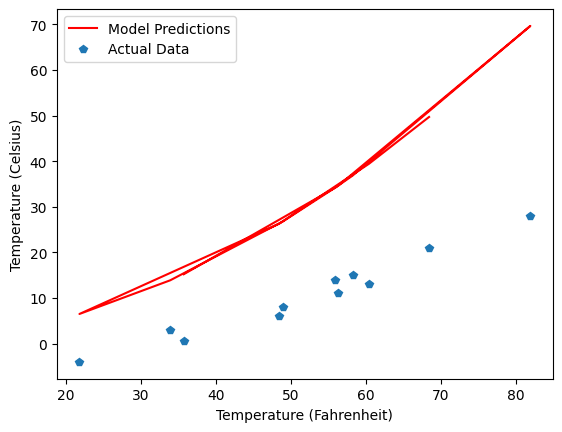

In [94]:
t_p = model(t_un, *params)

plt.figure()

# Set labels for the axes
plt.xlabel('Temperature (Fahrenheit)')
plt.ylabel('Temperature (Celsius)')

# Plot the model's predictions in peachpuff color
plt.plot(t_u.numpy(), t_p.detach().numpy(), color='red', label='Model Predictions')

# Plot the actual data as points
plt.plot(t_u.numpy(), t_c.numpy(), 'p', label='Actual Data')

# Add a legend to the plot
plt.legend()

# Show the plot
plt.show()

In [95]:
t_un = 0.1*t_u
params = torch.tensor([1.0,1.0,0.0], requires_grad=True)
learning_rate = 0.01
optimizer = optim.SGD([params], lr = learning_rate)

training_loop(
    n_epochs=5000,
    optimizer = optimizer,
    params = params,
    t_u = t_un,
    t_c = t_c)

Epoch 1, loss 675.7944
Epoch 500, loss nan
Epoch 1000, loss nan
Epoch 1500, loss nan
Epoch 2000, loss nan
Epoch 2500, loss nan
Epoch 3000, loss nan
Epoch 3500, loss nan
Epoch 4000, loss nan
Epoch 4500, loss nan
Epoch 5000, loss nan


tensor([nan, nan, nan], requires_grad=True)

2nd Problem

In [96]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [97]:
#Use the URL for the raw CSV data
url = 'https://raw.githubusercontent.com/dhanush852/intro_to-ml/main/Housing.csv'
df = pd.read_csv(url)

# Display the first 5 rows of the DataFrame
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [24]:
input_features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
output_feature = 'price'

In [98]:
scaler = StandardScaler()
df[input_features + [output_feature]] = scaler.fit_transform(df[input_features + [output_feature]])

In [99]:
from sklearn.model_selection import train_test_split

X = df[input_features].values
y = df[[output_feature]].values

In [103]:
X_t = torch.tensor(X)
y_t = torch.tensor(y)

In [104]:
def model(X, W1, W2, W3, W4, W5, B):
    return W5*X[:,4] + W4*X[:,3] + W3*X[:,2] + W2*X[:,1] + W1*X[:,0] + B

In [105]:
np.random.seed(13)
train_X, val_X, train_Y, val_Y = train_test_split(X_t, y_t, test_size=0.2, random_state=100)

In [106]:
train_X.shape, train_Y.shape, val_X.shape, val_Y.shape

(torch.Size([436, 5]),
 torch.Size([436, 1]),
 torch.Size([109, 5]),
 torch.Size([109, 1]))

In [107]:
def training_loop(n_epochs, optimizer, params, X_train, X_val, y_train, y_val):

    for epoch in range(1, n_epochs + 1):
        y_train_p = model(X_train, *params)
        train_loss = loss_fn(y_train_p, y_train)

        y_val_p = model(X_train, *params)
        val_loss = loss_fn(y_val_p, y_val)

        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()

        if epoch % 500 == 0:
            print(f"Epoch {epoch}, Training loss {train_loss.item():.4f},"
                  f" Validation loss {val_loss.item():.4f}")

    return params

In [108]:
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
learning_rate = 0.1
optimizer = optim.Adam([params], lr=learning_rate)

training_loop(
    n_epochs = 5000,
    optimizer = optimizer,
    params = params,
    X_train = train_X,
    X_val = val_X,
    y_train = train_Y,
    y_val = val_Y)

Epoch 500, Training loss 0.9961, Validation loss 1.0167
Epoch 1000, Training loss 0.9961, Validation loss 1.0167
Epoch 1500, Training loss 0.9961, Validation loss 1.0167
Epoch 2000, Training loss 0.9961, Validation loss 1.0175
Epoch 2500, Training loss 0.9961, Validation loss 1.0167
Epoch 3000, Training loss 0.9961, Validation loss 1.0167
Epoch 3500, Training loss 0.9961, Validation loss 1.0167
Epoch 4000, Training loss 0.9961, Validation loss 1.0167
Epoch 4500, Training loss 0.9961, Validation loss 1.0167
Epoch 5000, Training loss 0.9961, Validation loss 1.0167


tensor([ 5.5435e-12, -2.2354e-11,  1.8757e-11,  2.7120e-11,  6.6666e-11,
         1.5519e-02], requires_grad=True)

In [109]:
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
learning_rate = 0.01
optimizer = optim.Adam([params], lr=learning_rate)

training_loop(
    n_epochs = 5000,
    optimizer = optimizer,
    params = params,
    X_train = train_X,
    X_val = val_X,
    y_train = train_Y,
    y_val = val_Y)

Epoch 500, Training loss 0.9961, Validation loss 1.0167
Epoch 1000, Training loss 0.9961, Validation loss 1.0167
Epoch 1500, Training loss 0.9961, Validation loss 1.0167
Epoch 2000, Training loss 0.9961, Validation loss 1.0167
Epoch 2500, Training loss 0.9961, Validation loss 1.0167
Epoch 3000, Training loss 0.9961, Validation loss 1.0167
Epoch 3500, Training loss 0.9961, Validation loss 1.0167
Epoch 4000, Training loss 0.9961, Validation loss 1.0167
Epoch 4500, Training loss 0.9961, Validation loss 1.0167
Epoch 5000, Training loss 0.9961, Validation loss 1.0166


tensor([-1.5259e-08, -1.7117e-07,  5.6357e-08,  9.3351e-08,  3.1048e-07,
         1.6152e-02], requires_grad=True)

In [110]:
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
learning_rate = 0.001
optimizer = optim.Adam([params], lr=learning_rate)

training_loop(
    n_epochs = 5000,
    optimizer = optimizer,
    params = params,
    X_train = train_X,
    X_val = val_X,
    y_train = train_Y,
    y_val = val_Y)

Epoch 500, Training loss 3.9224, Validation loss 3.9430
Epoch 1000, Training loss 1.6151, Validation loss 1.6357
Epoch 1500, Training loss 1.0697, Validation loss 1.0903
Epoch 2000, Training loss 1.0001, Validation loss 1.0207
Epoch 2500, Training loss 0.9962, Validation loss 1.0168
Epoch 3000, Training loss 0.9961, Validation loss 1.0167
Epoch 3500, Training loss 0.9961, Validation loss 1.0167
Epoch 4000, Training loss 0.9961, Validation loss 1.0167
Epoch 4500, Training loss 0.9961, Validation loss 1.0167
Epoch 5000, Training loss 0.9961, Validation loss 1.0167


tensor([-7.3107e-10, -6.4281e-09,  2.7522e-09,  3.5717e-09,  1.1928e-09,
         1.5519e-02], requires_grad=True)

In [111]:
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
learning_rate = 0.0001
optimizer = optim.Adam([params], lr=learning_rate)

training_loop(
    n_epochs = 5000,
    optimizer = optimizer,
    params = params,
    X_train = train_X,
    X_val = val_X,
    y_train = train_Y,
    y_val = val_Y)

Epoch 500, Training loss 9.3915, Validation loss 9.4121
Epoch 1000, Training loss 8.5590, Validation loss 8.5795
Epoch 1500, Training loss 7.7847, Validation loss 7.8052
Epoch 2000, Training loss 7.0642, Validation loss 7.0848
Epoch 2500, Training loss 6.3941, Validation loss 6.4147
Epoch 3000, Training loss 5.7714, Validation loss 5.7920
Epoch 3500, Training loss 5.1939, Validation loss 5.2145
Epoch 4000, Training loss 4.6598, Validation loss 4.6804
Epoch 4500, Training loss 4.1675, Validation loss 4.1881
Epoch 5000, Training loss 3.7160, Validation loss 3.7366


tensor([ 0.5410,  0.5410,  0.5410,  0.5410,  0.5410, -0.0044],
       requires_grad=True)

In [112]:

params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
learning_rate = 0.1
optimizer = optim.SGD([params], lr=learning_rate)

training_loop(
    n_epochs = 5000,
    optimizer = optimizer,
    params = params,
    X_train = train_X,
    X_val = val_X,
    y_train = train_Y,
    y_val = val_Y)



Epoch 500, Training loss 0.9961, Validation loss 1.0167
Epoch 1000, Training loss 0.9961, Validation loss 1.0167
Epoch 1500, Training loss 0.9961, Validation loss 1.0167
Epoch 2000, Training loss 0.9961, Validation loss 1.0167
Epoch 2500, Training loss 0.9961, Validation loss 1.0167
Epoch 3000, Training loss 0.9961, Validation loss 1.0167
Epoch 3500, Training loss 0.9961, Validation loss 1.0167
Epoch 4000, Training loss 0.9961, Validation loss 1.0167
Epoch 4500, Training loss 0.9961, Validation loss 1.0167
Epoch 5000, Training loss 0.9961, Validation loss 1.0167


tensor([-3.2832e-11, -9.5968e-11,  2.7644e-11,  5.5027e-11,  9.3738e-11,
         1.5519e-02], requires_grad=True)

In [113]:
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
learning_rate = 0.01
optimizer = optim.SGD([params], lr=learning_rate)

training_loop(
    n_epochs = 5000,
    optimizer = optimizer,
    params = params,
    X_train = train_X,
    X_val = val_X,
    y_train = train_Y,
    y_val = val_Y)

Epoch 500, Training loss 0.9961, Validation loss 1.0167
Epoch 1000, Training loss 0.9961, Validation loss 1.0167
Epoch 1500, Training loss 0.9961, Validation loss 1.0167
Epoch 2000, Training loss 0.9961, Validation loss 1.0167
Epoch 2500, Training loss 0.9961, Validation loss 1.0167
Epoch 3000, Training loss 0.9961, Validation loss 1.0167
Epoch 3500, Training loss 0.9961, Validation loss 1.0167
Epoch 4000, Training loss 0.9961, Validation loss 1.0167
Epoch 4500, Training loss 0.9961, Validation loss 1.0167
Epoch 5000, Training loss 0.9961, Validation loss 1.0167


tensor([-4.4244e-10, -1.2932e-09,  3.7252e-10,  7.4154e-10,  1.2632e-09,
         1.5519e-02], requires_grad=True)

In [114]:
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
learning_rate = 0.001
optimizer = optim.SGD([params], lr=learning_rate)

training_loop(
    n_epochs = 5000,
    optimizer = optimizer,
    params = params,
    X_train = train_X,
    X_val = val_X,
    y_train = train_Y,
    y_val = val_Y)

Epoch 500, Training loss 1.2285, Validation loss 1.2479
Epoch 1000, Training loss 1.0042, Validation loss 1.0239
Epoch 1500, Training loss 0.9968, Validation loss 1.0169
Epoch 2000, Training loss 0.9963, Validation loss 1.0166
Epoch 2500, Training loss 0.9962, Validation loss 1.0166
Epoch 3000, Training loss 0.9961, Validation loss 1.0167
Epoch 3500, Training loss 0.9961, Validation loss 1.0167
Epoch 4000, Training loss 0.9961, Validation loss 1.0167
Epoch 4500, Training loss 0.9961, Validation loss 1.0167
Epoch 5000, Training loss 0.9961, Validation loss 1.0167


tensor([-4.2783e-06, -2.1327e-04, -8.2233e-05,  2.6443e-04,  8.9936e-05,
         1.5484e-02], requires_grad=True)

In [115]:
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
learning_rate = 0.0001
optimizer = optim.SGD([params], lr=learning_rate)

training_loop(
    n_epochs = 5000,
    optimizer = optimizer,
    params = params,
    X_train = train_X,
    X_val = val_X,
    y_train = train_Y,
    y_val = val_Y)

Epoch 500, Training loss 7.3896, Validation loss 7.4125
Epoch 1000, Training loss 5.3963, Validation loss 5.4182
Epoch 1500, Training loss 4.0271, Validation loss 4.0484
Epoch 2000, Training loss 3.0861, Validation loss 3.1069
Epoch 2500, Training loss 2.4390, Validation loss 2.4593
Epoch 3000, Training loss 1.9936, Validation loss 2.0137
Epoch 3500, Training loss 1.6869, Validation loss 1.7067
Epoch 4000, Training loss 1.4753, Validation loss 1.4950
Epoch 4500, Training loss 1.3293, Validation loss 1.3488
Epoch 5000, Training loss 1.2284, Validation loss 1.2478


tensor([ 0.1940,  0.1146,  0.1084,  0.1675,  0.2101, -0.0011],
       requires_grad=True)

3rd problem

In [49]:
#Use the URL for the raw CSV data
url = 'https://raw.githubusercontent.com/dhanush852/intro_to-ml/main/Housing.csv'
df = pd.read_csv(url)

# Display the first 5 rows of the DataFrame
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [116]:
binary_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

In [117]:
df[binary_columns] = df[binary_columns].replace({'yes': 1, 'no': 0})

In [118]:
df['furnishingstatus'] = df['furnishingstatus'].replace({'furnished': 2, 'semi-furnished': 1, 'unfurnished': 0})

In [120]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,4.566365,1.046726,1.403419,1.421812,1.378217,1,0,0,0,1,1.517692,1,2
1,4.004484,1.757010,1.403419,5.405809,2.532024,1,0,0,0,1,2.679409,0,2
2,4.004484,2.218232,0.047278,1.421812,0.224410,1,0,1,0,0,1.517692,1,1
3,3.985755,1.083624,1.403419,1.421812,0.224410,1,0,1,0,1,2.679409,1,2
4,3.554979,1.046726,1.403419,-0.570187,0.224410,1,1,1,0,1,1.517692,0,2


In [121]:
X = df.drop('price', axis = 1)
y = df[['price']]

In [122]:
scalar = MinMaxScaler()
scalar_out = MinMaxScaler()
X = scalar.fit_transform(X)
y = scalar_out.fit_transform(y)

In [123]:
np.random.seed(13)
train_X, val_X, train_Y, val_Y = train_test_split(X, y, test_size=0.2, random_state=100)

In [124]:
X_train = torch.tensor(train_X)
Y_train = torch.tensor(train_Y)
X_test = torch.tensor(val_X)
Y_test = torch.tensor(val_Y)

In [125]:
def model(X, W1, W2, W3, W4, W5, W6, W7, W8, W9, W10, W11, W12, B):
    return (W12*X[:,11] + W11*X[:,10] + W10*X[:,9] + W9*X[:,8] +
            W8*X[:,7] + W7*X[:,6] + W6*X[:,5] + W5*X[:,4] +
            W4*X[:,3] + W3*X[:,2] + W2*X[:,1] + W1*X[:,0] + B)

In [126]:
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
learning_rate = 0.1
optimizer = optim.Adam([params], lr=learning_rate)

training_loop(
    n_epochs = 5000,
    optimizer = optimizer,
    params = params,
    X_train = X_train,
    X_val = X_test,
    y_train = Y_train,
    y_val = Y_test)

Epoch 500, Training loss 0.0261, Validation loss 0.0266
Epoch 1000, Training loss 0.0261, Validation loss 0.0266
Epoch 1500, Training loss 0.0261, Validation loss 0.0266
Epoch 2000, Training loss 0.0261, Validation loss 0.0266
Epoch 2500, Training loss 0.0261, Validation loss 0.0266
Epoch 3000, Training loss 0.0261, Validation loss 0.0266
Epoch 3500, Training loss 0.0261, Validation loss 0.0266
Epoch 4000, Training loss 0.0261, Validation loss 0.0266
Epoch 4500, Training loss 0.0261, Validation loss 0.0266
Epoch 5000, Training loss 0.0261, Validation loss 0.0266


tensor([ 7.7686e-09,  3.5388e-08, -6.4710e-09, -2.6042e-09,  1.1980e-08,
        -6.9857e-10,  1.0804e-09,  7.1829e-10,  5.6827e-10, -1.3954e-09,
        -7.8976e-10,  2.8398e-09,  2.6370e-01], requires_grad=True)

In [127]:
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
learning_rate = 0.1
optimizer = optim.SGD([params], lr=learning_rate)

training_loop(
    n_epochs = 5000,
    optimizer = optimizer,
    params = params,
    X_train = X_train,
    X_val = X_test,
    y_train = Y_train,
    y_val = Y_test)

Epoch 500, Training loss 0.0266, Validation loss 0.0271
Epoch 1000, Training loss 0.0261, Validation loss 0.0266
Epoch 1500, Training loss 0.0261, Validation loss 0.0266
Epoch 2000, Training loss 0.0261, Validation loss 0.0266
Epoch 2500, Training loss 0.0261, Validation loss 0.0266
Epoch 3000, Training loss 0.0261, Validation loss 0.0266
Epoch 3500, Training loss 0.0261, Validation loss 0.0266
Epoch 4000, Training loss 0.0261, Validation loss 0.0266
Epoch 4500, Training loss 0.0261, Validation loss 0.0266
Epoch 5000, Training loss 0.0261, Validation loss 0.0266


tensor([ 3.0490e-07,  2.4578e-06, -7.3864e-07, -2.8665e-07,  5.1172e-07,
        -4.7985e-09, -4.7374e-09,  4.0010e-08,  5.1315e-08, -1.0213e-07,
        -2.7737e-08,  1.1209e-07,  2.6370e-01], requires_grad=True)

In [128]:
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
learning_rate = 0.01
optimizer = optim.Adam([params], lr=learning_rate)

training_loop(
    n_epochs = 5000,
    optimizer = optimizer,
    params = params,
    X_train = X_train,
    X_val = X_test,
    y_train = Y_train,
    y_val = Y_test)

Epoch 500, Training loss 0.0632, Validation loss 0.0625
Epoch 1000, Training loss 0.0369, Validation loss 0.0370
Epoch 1500, Training loss 0.0296, Validation loss 0.0299
Epoch 2000, Training loss 0.0272, Validation loss 0.0276
Epoch 2500, Training loss 0.0263, Validation loss 0.0268
Epoch 3000, Training loss 0.0261, Validation loss 0.0266
Epoch 3500, Training loss 0.0261, Validation loss 0.0266
Epoch 4000, Training loss 0.0261, Validation loss 0.0266
Epoch 4500, Training loss 0.0261, Validation loss 0.0266
Epoch 5000, Training loss 0.0261, Validation loss 0.0266


tensor([-3.6263e-07,  3.2521e-05, -6.6877e-06, -6.0568e-06,  4.8141e-06,
         1.1265e-07, -1.0922e-06,  2.7312e-08,  6.4476e-07, -1.7559e-06,
        -9.8926e-08,  5.0206e-07,  2.6369e-01], requires_grad=True)

In [129]:
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
learning_rate = 0.01
optimizer = optim.SGD([params], lr=learning_rate)

training_loop(
    n_epochs = 5000,
    optimizer = optimizer,
    params = params,
    X_train = X_train,
    X_val = X_test,
    y_train = Y_train,
    y_val = Y_test)


Epoch 500, Training loss 0.1106, Validation loss 0.1100
Epoch 1000, Training loss 0.0514, Validation loss 0.0514
Epoch 1500, Training loss 0.0365, Validation loss 0.0368
Epoch 2000, Training loss 0.0314, Validation loss 0.0318
Epoch 2500, Training loss 0.0293, Validation loss 0.0297
Epoch 3000, Training loss 0.0281, Validation loss 0.0286
Epoch 3500, Training loss 0.0275, Validation loss 0.0280
Epoch 4000, Training loss 0.0270, Validation loss 0.0275
Epoch 4500, Training loss 0.0268, Validation loss 0.0273
Epoch 5000, Training loss 0.0266, Validation loss 0.0271


tensor([ 0.0989,  0.1284, -0.0024, -0.0337,  0.0055, -0.0052, -0.0059,  0.0027,
        -0.0006, -0.0288, -0.0044, -0.0023,  0.2059], requires_grad=True)

In [130]:
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
learning_rate = 0.001
optimizer = optim.Adam([params], lr=learning_rate)

training_loop(
    n_epochs = 5000,
    optimizer = optimizer,
    params = params,
    X_train = X_train,
    X_val = X_test,
    y_train = Y_train,
    y_val = Y_test)


Epoch 500, Training loss 3.0653, Validation loss 3.1027
Epoch 1000, Training loss 0.4619, Validation loss 0.4718
Epoch 1500, Training loss 0.1662, Validation loss 0.1662
Epoch 2000, Training loss 0.1275, Validation loss 0.1258
Epoch 2500, Training loss 0.1021, Validation loss 0.1005
Epoch 3000, Training loss 0.0822, Validation loss 0.0810
Epoch 3500, Training loss 0.0674, Validation loss 0.0666
Epoch 4000, Training loss 0.0567, Validation loss 0.0561
Epoch 4500, Training loss 0.0486, Validation loss 0.0483
Epoch 5000, Training loss 0.0424, Validation loss 0.0423


tensor([ 0.1879,  0.4309, -0.0843,  0.0285,  0.2606, -0.0351,  0.0437, -0.0015,
        -0.0143, -0.0138, -0.0359,  0.0654, -0.2229], requires_grad=True)

In [131]:
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
learning_rate = 0.001
optimizer = optim.SGD([params], lr=learning_rate)
training_loop(
    n_epochs = 5000,
    optimizer = optimizer,
    params = params,
    X_train = X_train,
    X_val = X_test,
    y_train = Y_train,
    y_val = Y_test)

Epoch 500, Training loss 0.6614, Validation loss 0.6642
Epoch 1000, Training loss 0.4570, Validation loss 0.4549
Epoch 1500, Training loss 0.3540, Validation loss 0.3520
Epoch 2000, Training loss 0.2819, Validation loss 0.2802
Epoch 2500, Training loss 0.2302, Validation loss 0.2288
Epoch 3000, Training loss 0.1922, Validation loss 0.1910
Epoch 3500, Training loss 0.1636, Validation loss 0.1626
Epoch 4000, Training loss 0.1416, Validation loss 0.1408
Epoch 4500, Training loss 0.1243, Validation loss 0.1236
Epoch 5000, Training loss 0.1104, Validation loss 0.1099


tensor([ 0.5183,  0.4717,  0.4918,  0.2092,  0.1215,  0.0781,  0.0316,  0.5595,
        -0.0360,  0.2279,  0.0632,  0.0688, -0.4441], requires_grad=True)

In [132]:
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
learning_rate = 0.0001
optimizer = optim.Adam([params], lr=learning_rate)

training_loop(
    n_epochs = 5000,
    optimizer = optimizer,
    params = params,
    X_train = X_train,
    X_val = X_test,
    y_train = Y_train,
    y_val = Y_test)

Epoch 500, Training loss 12.5858, Validation loss 12.6664
Epoch 1000, Training loss 10.9728, Validation loss 11.0478
Epoch 1500, Training loss 9.5106, Validation loss 9.5801
Epoch 2000, Training loss 8.1862, Validation loss 8.2504
Epoch 2500, Training loss 6.9893, Validation loss 7.0483
Epoch 3000, Training loss 5.9115, Validation loss 5.9653
Epoch 3500, Training loss 4.9458, Validation loss 4.9947
Epoch 4000, Training loss 4.0866, Validation loss 4.1306
Epoch 4500, Training loss 3.3290, Validation loss 3.3681
Epoch 5000, Training loss 2.6683, Validation loss 2.7027


tensor([ 0.5584,  0.5598,  0.5553,  0.5574,  0.5595,  0.5532,  0.5556,  0.5562,
         0.5547,  0.5569,  0.5543,  0.5576, -0.4386], requires_grad=True)

In [133]:
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
learning_rate = 0.0001
optimizer = optim.SGD([params], lr=learning_rate)

training_loop(
    n_epochs = 5000,
    optimizer = optimizer,
    params = params,
    X_train = X_train,
    X_val = X_test,
    y_train = Y_train,
    y_val = Y_test)


Epoch 500, Training loss 8.6164, Validation loss 8.6813
Epoch 1000, Training loss 5.2840, Validation loss 5.3325
Epoch 1500, Training loss 3.3520, Validation loss 3.3881
Epoch 2000, Training loss 2.2283, Validation loss 2.2549
Epoch 2500, Training loss 1.5711, Validation loss 1.5906
Epoch 3000, Training loss 1.1834, Validation loss 1.1975
Epoch 3500, Training loss 0.9514, Validation loss 0.9614
Epoch 4000, Training loss 0.8097, Validation loss 0.8166
Epoch 4500, Training loss 0.7203, Validation loss 0.7248
Epoch 5000, Training loss 0.6613, Validation loss 0.6641


tensor([ 0.6704,  0.5231,  0.8151,  0.5870, -0.0379,  0.6102,  0.3880,  0.8936,
         0.4319,  0.6165,  0.5403,  0.3346, -1.0692], requires_grad=True)